Prachi Mehta

UID: 2018130025

DS Tutorial 1


In [ ]:
#importing pandas,matplotlib,numpy,seaborn library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the csv file and storing it in dataframe
df = pd.read_csv('/content/sample_data/DataPanelWHR2021.csv',encoding='latin-1')
print(df)

     Country name  year  ...  Positive affect  Negative affect
0     Afghanistan  2008  ...            0.518            0.258
1     Afghanistan  2009  ...            0.584            0.237
2     Afghanistan  2010  ...            0.618            0.275
3     Afghanistan  2011  ...            0.611            0.267
4     Afghanistan  2012  ...            0.710            0.268
...           ...   ...  ...              ...              ...
1944     Zimbabwe  2016  ...            0.738            0.209
1945     Zimbabwe  2017  ...            0.806            0.224
1946     Zimbabwe  2018  ...            0.710            0.212
1947     Zimbabwe  2019  ...            0.716            0.235
1948     Zimbabwe  2020  ...            0.703            0.346

[1949 rows x 11 columns]


In [ ]:
index = df.index
number_of_rows = len(index)
print(number_of_rows)

1949


In [ ]:
n = df.shape[1]
print("Number of columns is:", n)

Number of columns is: 11


In [ ]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


Columns meaning:

Ladder score - means if you have bigger score you can have better possibilities in life, than someone whose have less score

Log GDP per capita - means Gross Domestic Product (GDP) per capita (per person)

Social support - means that person has a family, friends and other people, who can make a support for them in difficult life situation

Healthy life expectancy at birth - years of healthy life which newborn can expect to have

Freedom to make life choices - means that people can choose job, family, friends, goverment and place to live on his own choice

Generosity - means the quality of kindness and generous

Perceptions of corruption - means degree of corruption in the country


In [ ]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

There are not many null values in the columns, therefore we can fill null values with mean values of this columns. 

In [ ]:
columns = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
for col in df[columns]:
    df[col] = df[col].fillna(df[col].mean())

Create a column with total score of happiness:

In [ ]:
df["Total_score"]= (df["Life Ladder"]+df["Log GDP per capita"]+df["Social support"]+df["Healthy life expectancy at birth"]+df["Freedom to make life choices"]+df["Generosity"]+df["Positive affect"])- (df["Perceptions of corruption"]+df["Negative affect"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1949 non-null   float64
 4   Social support                    1949 non-null   float64
 5   Healthy life expectancy at birth  1949 non-null   float64
 6   Freedom to make life choices      1949 non-null   float64
 7   Generosity                        1949 non-null   float64
 8   Perceptions of corruption         1949 non-null   float64
 9   Positive affect                   1949 non-null   float64
 10  Negative affect                   1949 non-null   float64
 11  Total_score                       1949 non-null   float64
dtypes: flo

In [ ]:
df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Total_score
year,1.000000,0.035515,0.077311,-0.010069,0.162174,0.220102,-0.041429,-0.079233,-0.003227,0.195926,0.141644
Life Ladder,0.035515,1.000000,0.783824,0.705356,0.741200,0.525844,0.186132,-0.419349,0.530459,-0.296786,0.823403
Log GDP per capita,0.077311,0.783824,1.000000,0.682438,0.834455,0.361404,-0.000901,-0.333645,0.297011,-0.204615,0.885613
Social support,-0.010069,0.705356,0.682438,1.000000,0.613854,0.408765,0.065510,-0.216028,0.430414,-0.395676,0.673561
Healthy life expectancy at birth,0.162174,0.741200,0.834455,0.613854,1.000000,0.382536,0.020276,-0.311815,0.313989,-0.135599,0.988382
Freedom to make life choices,0.220102,0.525844,0.361404,0.408765,0.382536,1.000000,0.319785,-0.476264,0.602743,-0.264397,0.445596
Generosity,-0.041429,0.186132,-0.000901,0.065510,0.020276,0.319785,1.000000,-0.278440,0.349683,-0.088906,0.069630
Perceptions of corruption,-0.079233,-0.419349,-0.333645,-0.216028,-0.311815,-0.476264,-0.278440,1.000000,-0.290161,0.257595,-0.370426
Positive affect,-0.003227,0.530459,0.297011,0.430414,0.313989,0.602743,0.349683,-0.290161,1.000000,-0.372901,0.381888
Negative affect,0.195926,-0.296786,-0.204615,-0.395676,-0.135599,-0.264397,-0.088906,0.257595,-0.372901,1.000000,-0.192973


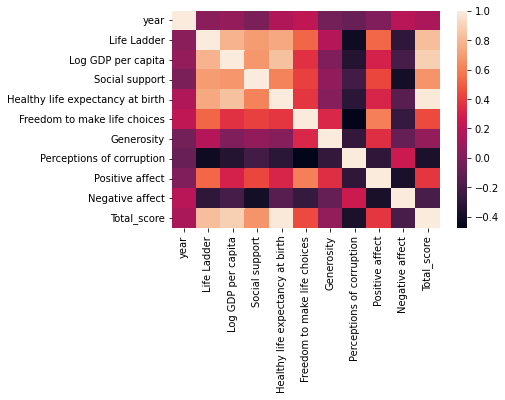

In [ ]:
sns.heatmap(df.corr());

From matrix correlation we can see that total score of happines has the higher depending on Healthy life expectancy at birth feature. Also the total score depends on Life Ladder and Log GDP per capita.

In [ ]:
#depending country of total score
c_t = df.groupby('Country name')['Total_score'].mean().sort_values(ascending= False).head(10)
c_t

Country name
Singapore      95.388990
Switzerland    94.260000
Norway         93.547600
Iceland        93.314138
Canada         93.073170
Australia      93.026007
Luxembourg     92.971727
New Zealand    92.834143
Sweden         92.639465
Netherlands    92.372365
Name: Total_score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


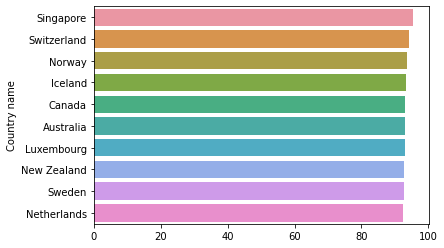

In [ ]:
sns.set_palette('RdBu')
sns.barplot(c_t.values, c_t.index)
plt.show()

Country name
Luxembourg              11.607091
Qatar                   11.507600
Singapore               11.329000
Switzerland             11.095400
Ireland                 11.064857
United Arab Emirates    11.059692
Norway                  11.039100
Kuwait                  10.974818
United States           10.956067
Austria                 10.886846
Name: Log GDP per capita, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


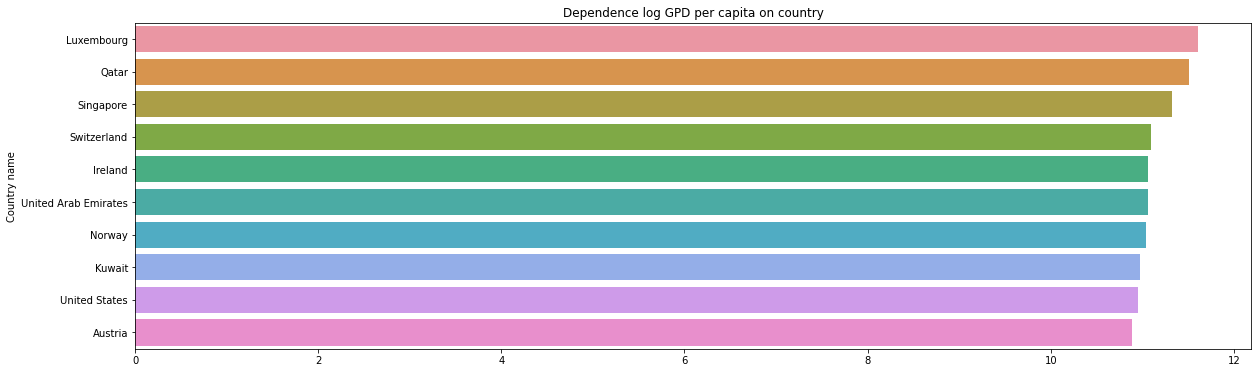

In [ ]:
#let's see dependence of GPD per capita, Healthy life expectancy at birth and Social support on country(top 10)
gpd_country = df.groupby('Country name')['Log GDP per capita'].mean().sort_values(ascending= False).head(10)
print(gpd_country)

sns.set_palette('PRGn')
plt.figure(figsize=(20, 6))
sns.barplot(gpd_country.values, gpd_country.index).set_title('Dependence log GPD per capita on country')
plt.show()

Country name
Singapore      75.358462
Japan          74.292000
Switzerland    73.334000
Spain          73.314667
Italy          72.974667
Cyprus         72.969231
Iceland        72.865000
France         72.789333
Canada         72.694667
Australia      72.692857
Name: Healthy life expectancy at birth, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


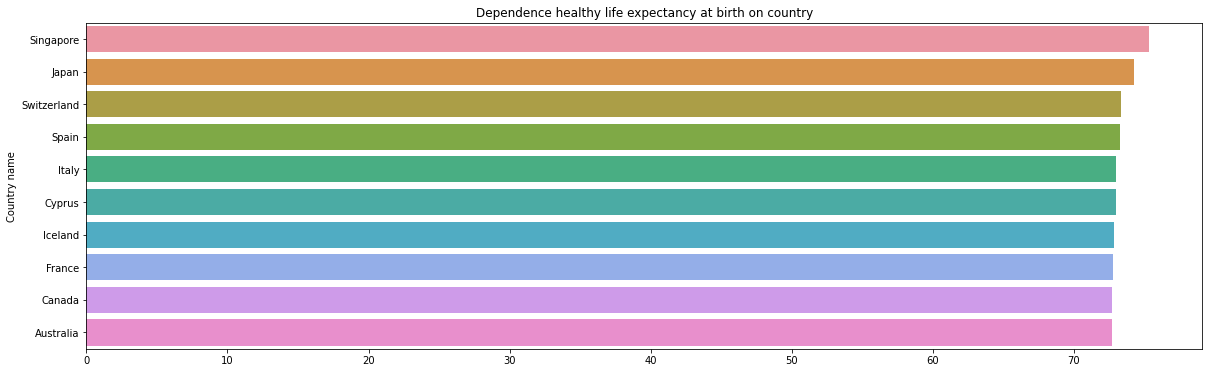

In [ ]:
lifeexp_country = df.groupby('Country name')['Healthy life expectancy at birth'].mean().sort_values(ascending=False).head(10)
print(lifeexp_country)

plt.figure(figsize=(20, 6))
sns.barplot(lifeexp_country.values, lifeexp_country.index).set_title('Dependence healthy life expectancy at birth on country')
plt.show()

Country name
Iceland           0.977500
Cuba              0.970000
Ireland           0.960000
Denmark           0.957133
New Zealand       0.952929
Norway            0.950500
Finland           0.949000
Australia         0.947357
United Kingdom    0.945333
Switzerland       0.943600
Name: Social support, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


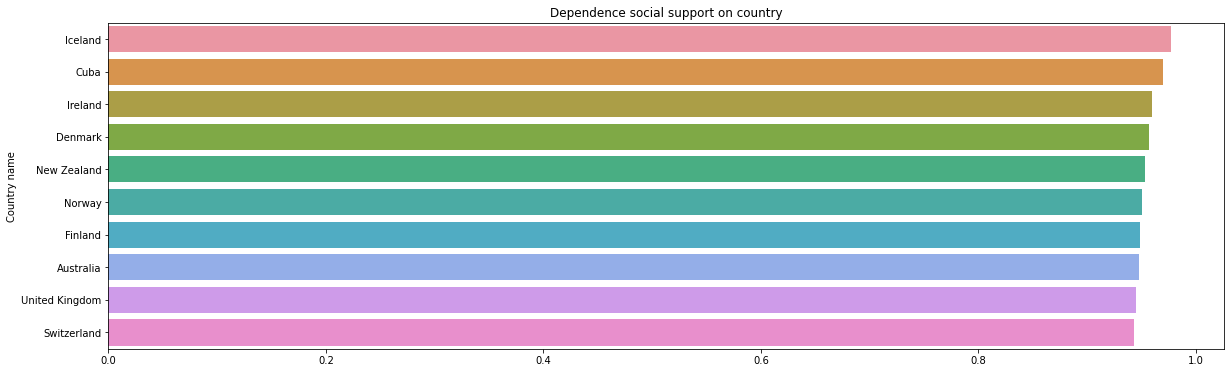

In [ ]:
social_country = df.groupby('Country name')['Social support'].mean().sort_values(ascending=False).head(10)
print(social_country)

plt.figure(figsize=(20, 6))
sns.barplot(social_country.values, social_country.index).set_title('Dependence social support on country')
plt.show()

Country name
Mali                        62.440692
Ivory Coast                 62.351222
Nigeria                     62.132385
Swaziland                   62.045333
Burundi                     61.660400
Lesotho                     60.073500
Haiti                       59.356909
Sierra Leone                57.943750
Chad                        57.904143
Central African Republic    54.270000
Name: Total_score, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


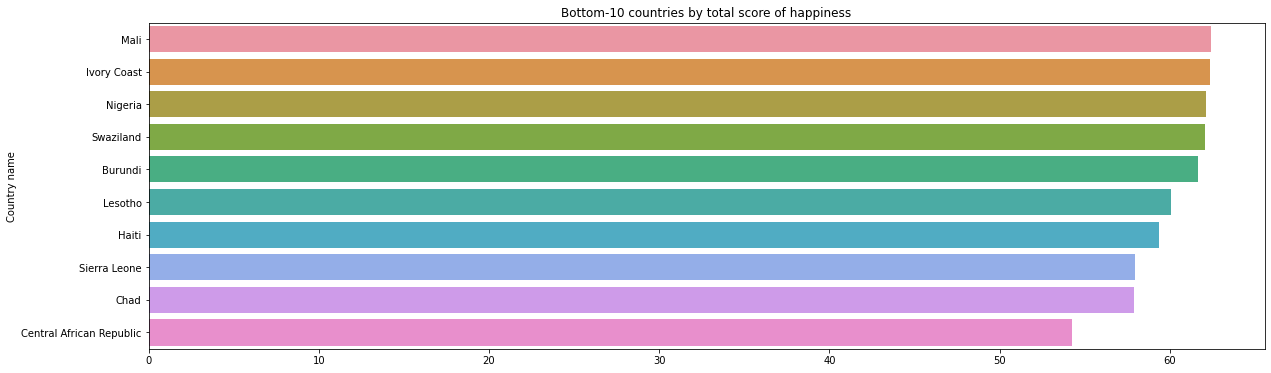

In [ ]:
total_country_bad = df.groupby('Country name')['Total_score'].mean().sort_values(ascending=False).tail(10)
print(total_country_bad)

plt.figure(figsize=(20, 6))
sns.barplot(total_country_bad.values, total_country_bad.index).set_title('Bottom-10 countries by total score of happiness')
plt.show()

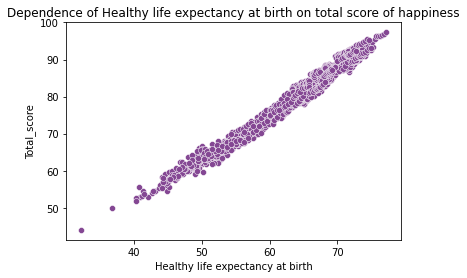

In [ ]:
sns.scatterplot(x='Healthy life expectancy at birth', y='Total_score', data=df).set(title='Dependence of Healthy life expectancy at birth on total score of happiness')
plt.show()

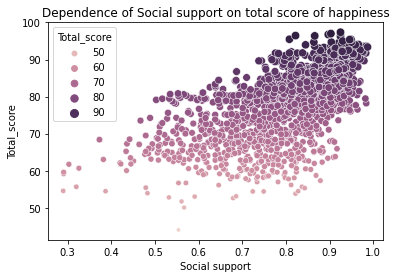

In [ ]:
sns.scatterplot(x='Social support', y='Total_score', data=df, size='Total_score', hue='Total_score').set(title='Dependence of Social support on total score of happiness')
plt.show()

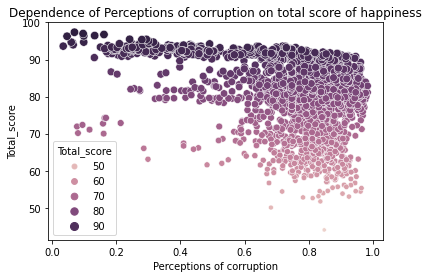

In [ ]:
sns.scatterplot(x='Perceptions of corruption', y='Total_score', data=df, size='Total_score', hue='Total_score').set(title='Dependence of Perceptions of corruption on total score of happiness')
plt.show()

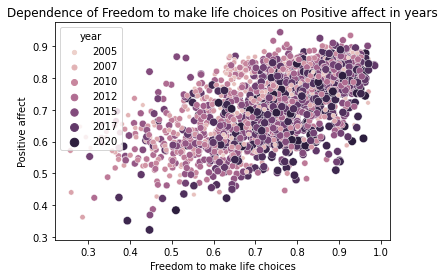

In [ ]:
sns.scatterplot(x='Freedom to make life choices', y='Positive affect', data=df, size='year', hue='year').set(title='Dependence of Freedom to make life choices on Positive affect in years')
plt.show()

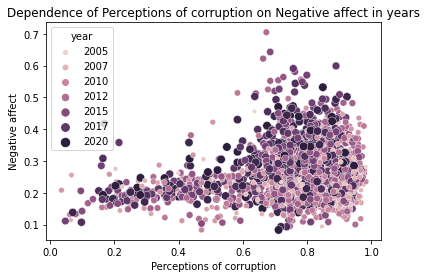

In [ ]:
sns.scatterplot(x='Perceptions of corruption', y='Negative affect', data=df, size='year', hue='year').set(title='Dependence of Perceptions of corruption on Negative affect in years')
plt.show()

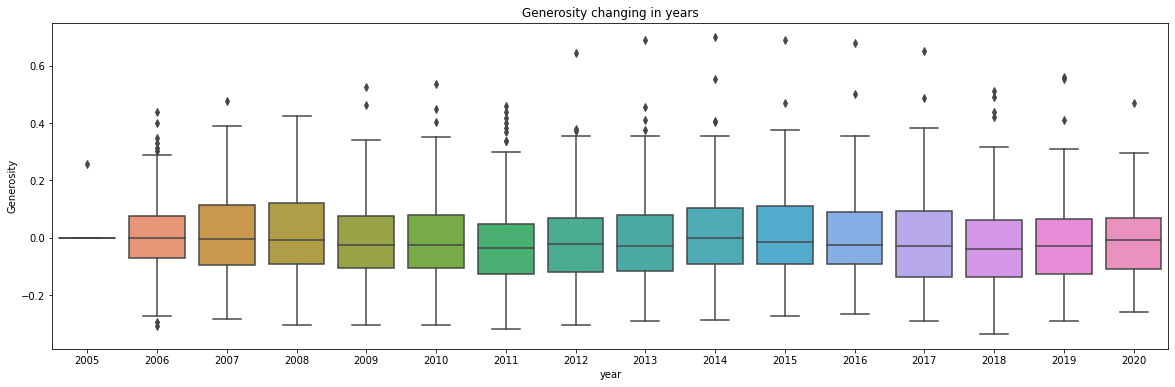

In [ ]:
#generosity by years in a boxplot()
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='Generosity', data=df).set(title='Generosity changing in years')
plt.show()

In [ ]:
corruption_country_top10 = df.groupby('Country name')['Perceptions of corruption'].mean().sort_values(ascending=False).head(10)
corruption_country_top10

Country name
Romania                   0.953231
Bosnia and Herzegovina    0.944154
Bulgaria                  0.942000
Moldova                   0.933733
Ukraine                   0.932600
Indonesia                 0.931429
Croatia                   0.927923
Trinidad and Tobago       0.927000
Portugal                  0.921154
Lithuania                 0.918333
Name: Perceptions of corruption, dtype: float64

In [ ]:
corruption_country_bottom10 = df.groupby('Country name')['Perceptions of corruption'].mean().sort_values(ascending=False).tail(10)
corruption_country_bottom10

Country name
Luxembourg                   0.377182
Hong Kong S.A.R. of China    0.348818
Norway                       0.344200
Switzerland                  0.305900
Sweden                       0.295008
New Zealand                  0.266214
Finland                      0.249000
Denmark                      0.200467
Rwanda                       0.186000
Singapore                    0.147779
Name: Perceptions of corruption, dtype: float64

In [ ]:
countries = df[(df['Country name'] == 'Russia')| (df['Country name'] == 'China') | (df['Country name'] == 'United States') | (df['Country name'] == 'Sweden') | (df['Country name'] == 'India')]

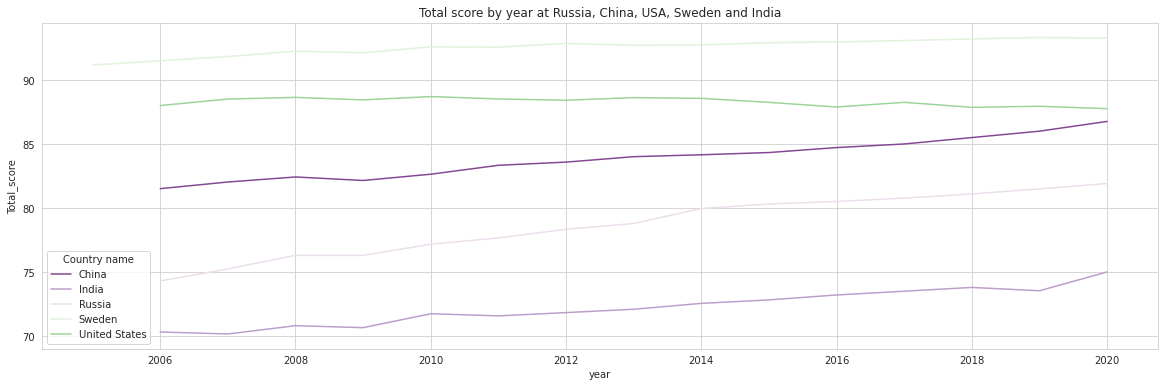

In [ ]:
#create a lineplot with this countries grouped by total score and year
sns.set_style('whitegrid')
sns.set_palette('PRGn')
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='Total_score', data=countries, hue='Country name').set(title='Total score by year at Russia, China, USA, Sweden and India')
plt.show()

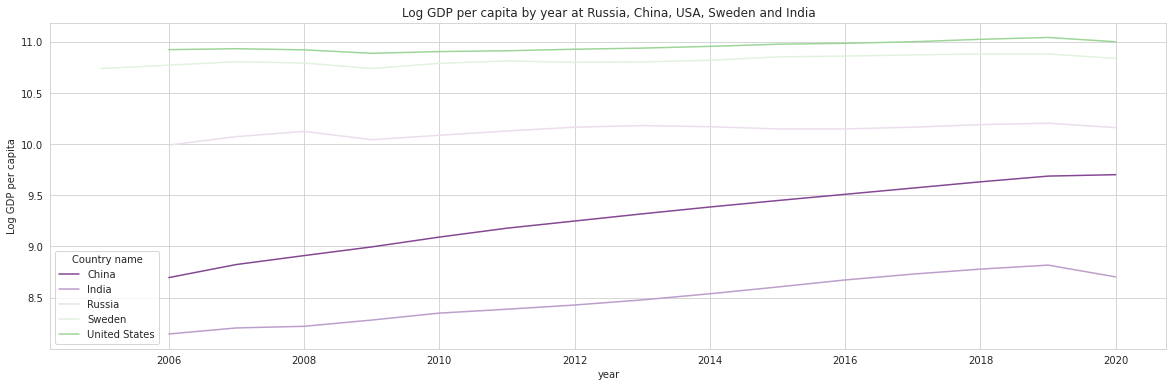

In [ ]:
#log GDP per capita in years
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='Log GDP per capita', data=countries, hue='Country name').set(title='Log GDP per capita by year at Russia, China, USA, Sweden and India')
plt.show()

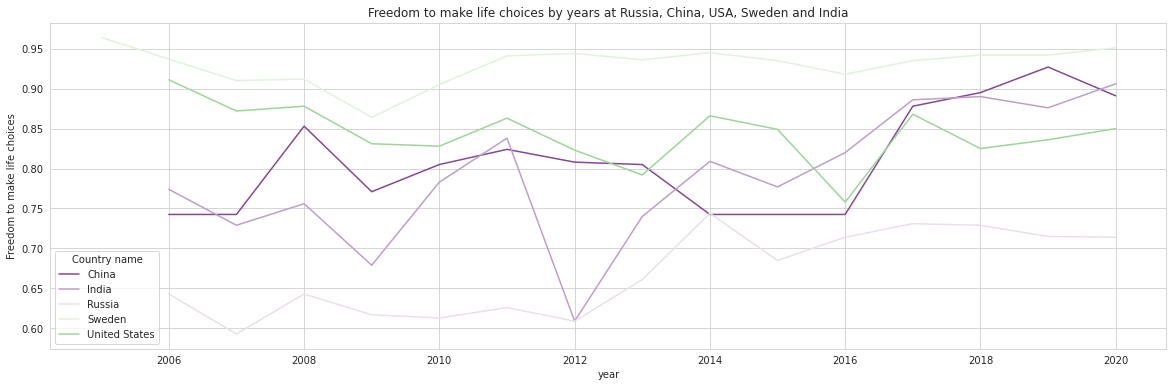

In [ ]:
#Freedom to make life choices by years
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='Freedom to make life choices', data=countries, hue='Country name').set(title='Freedom to make life choices by years at Russia, China, USA, Sweden and India')
plt.show()

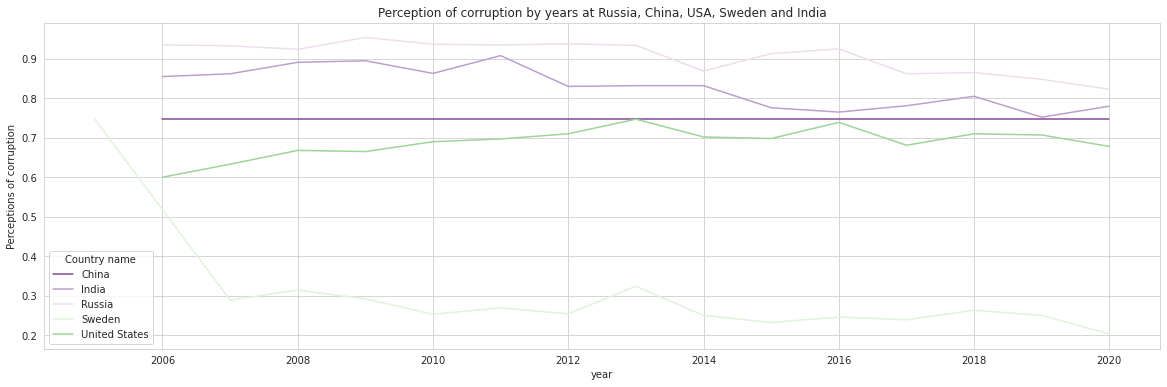

In [ ]:
#perception of corruption by years
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='Perceptions of corruption', data=countries, hue='Country name').set(title='Perception of corruption by years at Russia, China, USA, Sweden and India')
plt.show()


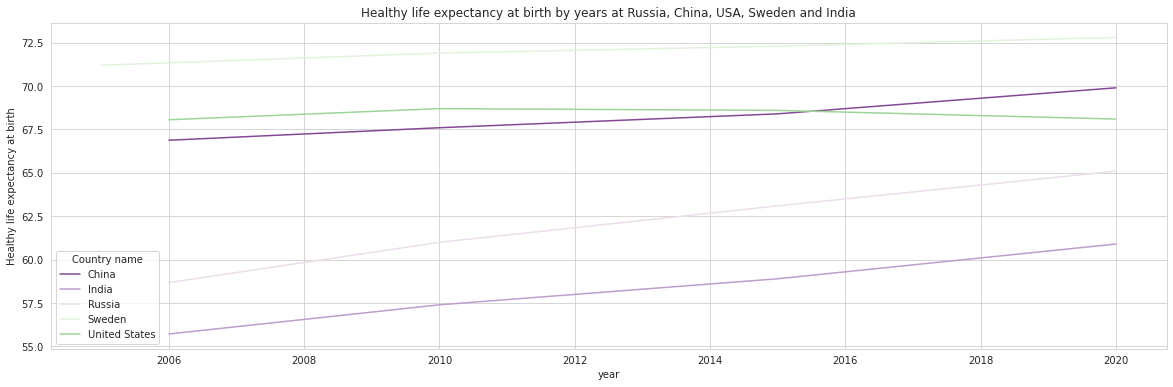

In [ ]:
#Healthy life expectancy at birth by years
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='Healthy life expectancy at birth', data=countries, hue='Country name').set(title='Healthy life expectancy at birth by years at Russia, China, USA, Sweden and India')
plt.show()
